In [ ]:
!nvidia-smi

Wed Mar 19 13:12:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}/dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oOVm6C6EzIVhVozRA6Ky")
project = rf.workspace("javid-4mvz6").project("items_detect")
version = project.version(10)
dataset = version.download("yolov8")

/content/dataset
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=100 imgsz=700 plots=True

/content
100% 6.25M/6.25M [00:00<00:00, 111MB/s]
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/items_detect-10/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=700, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

/content


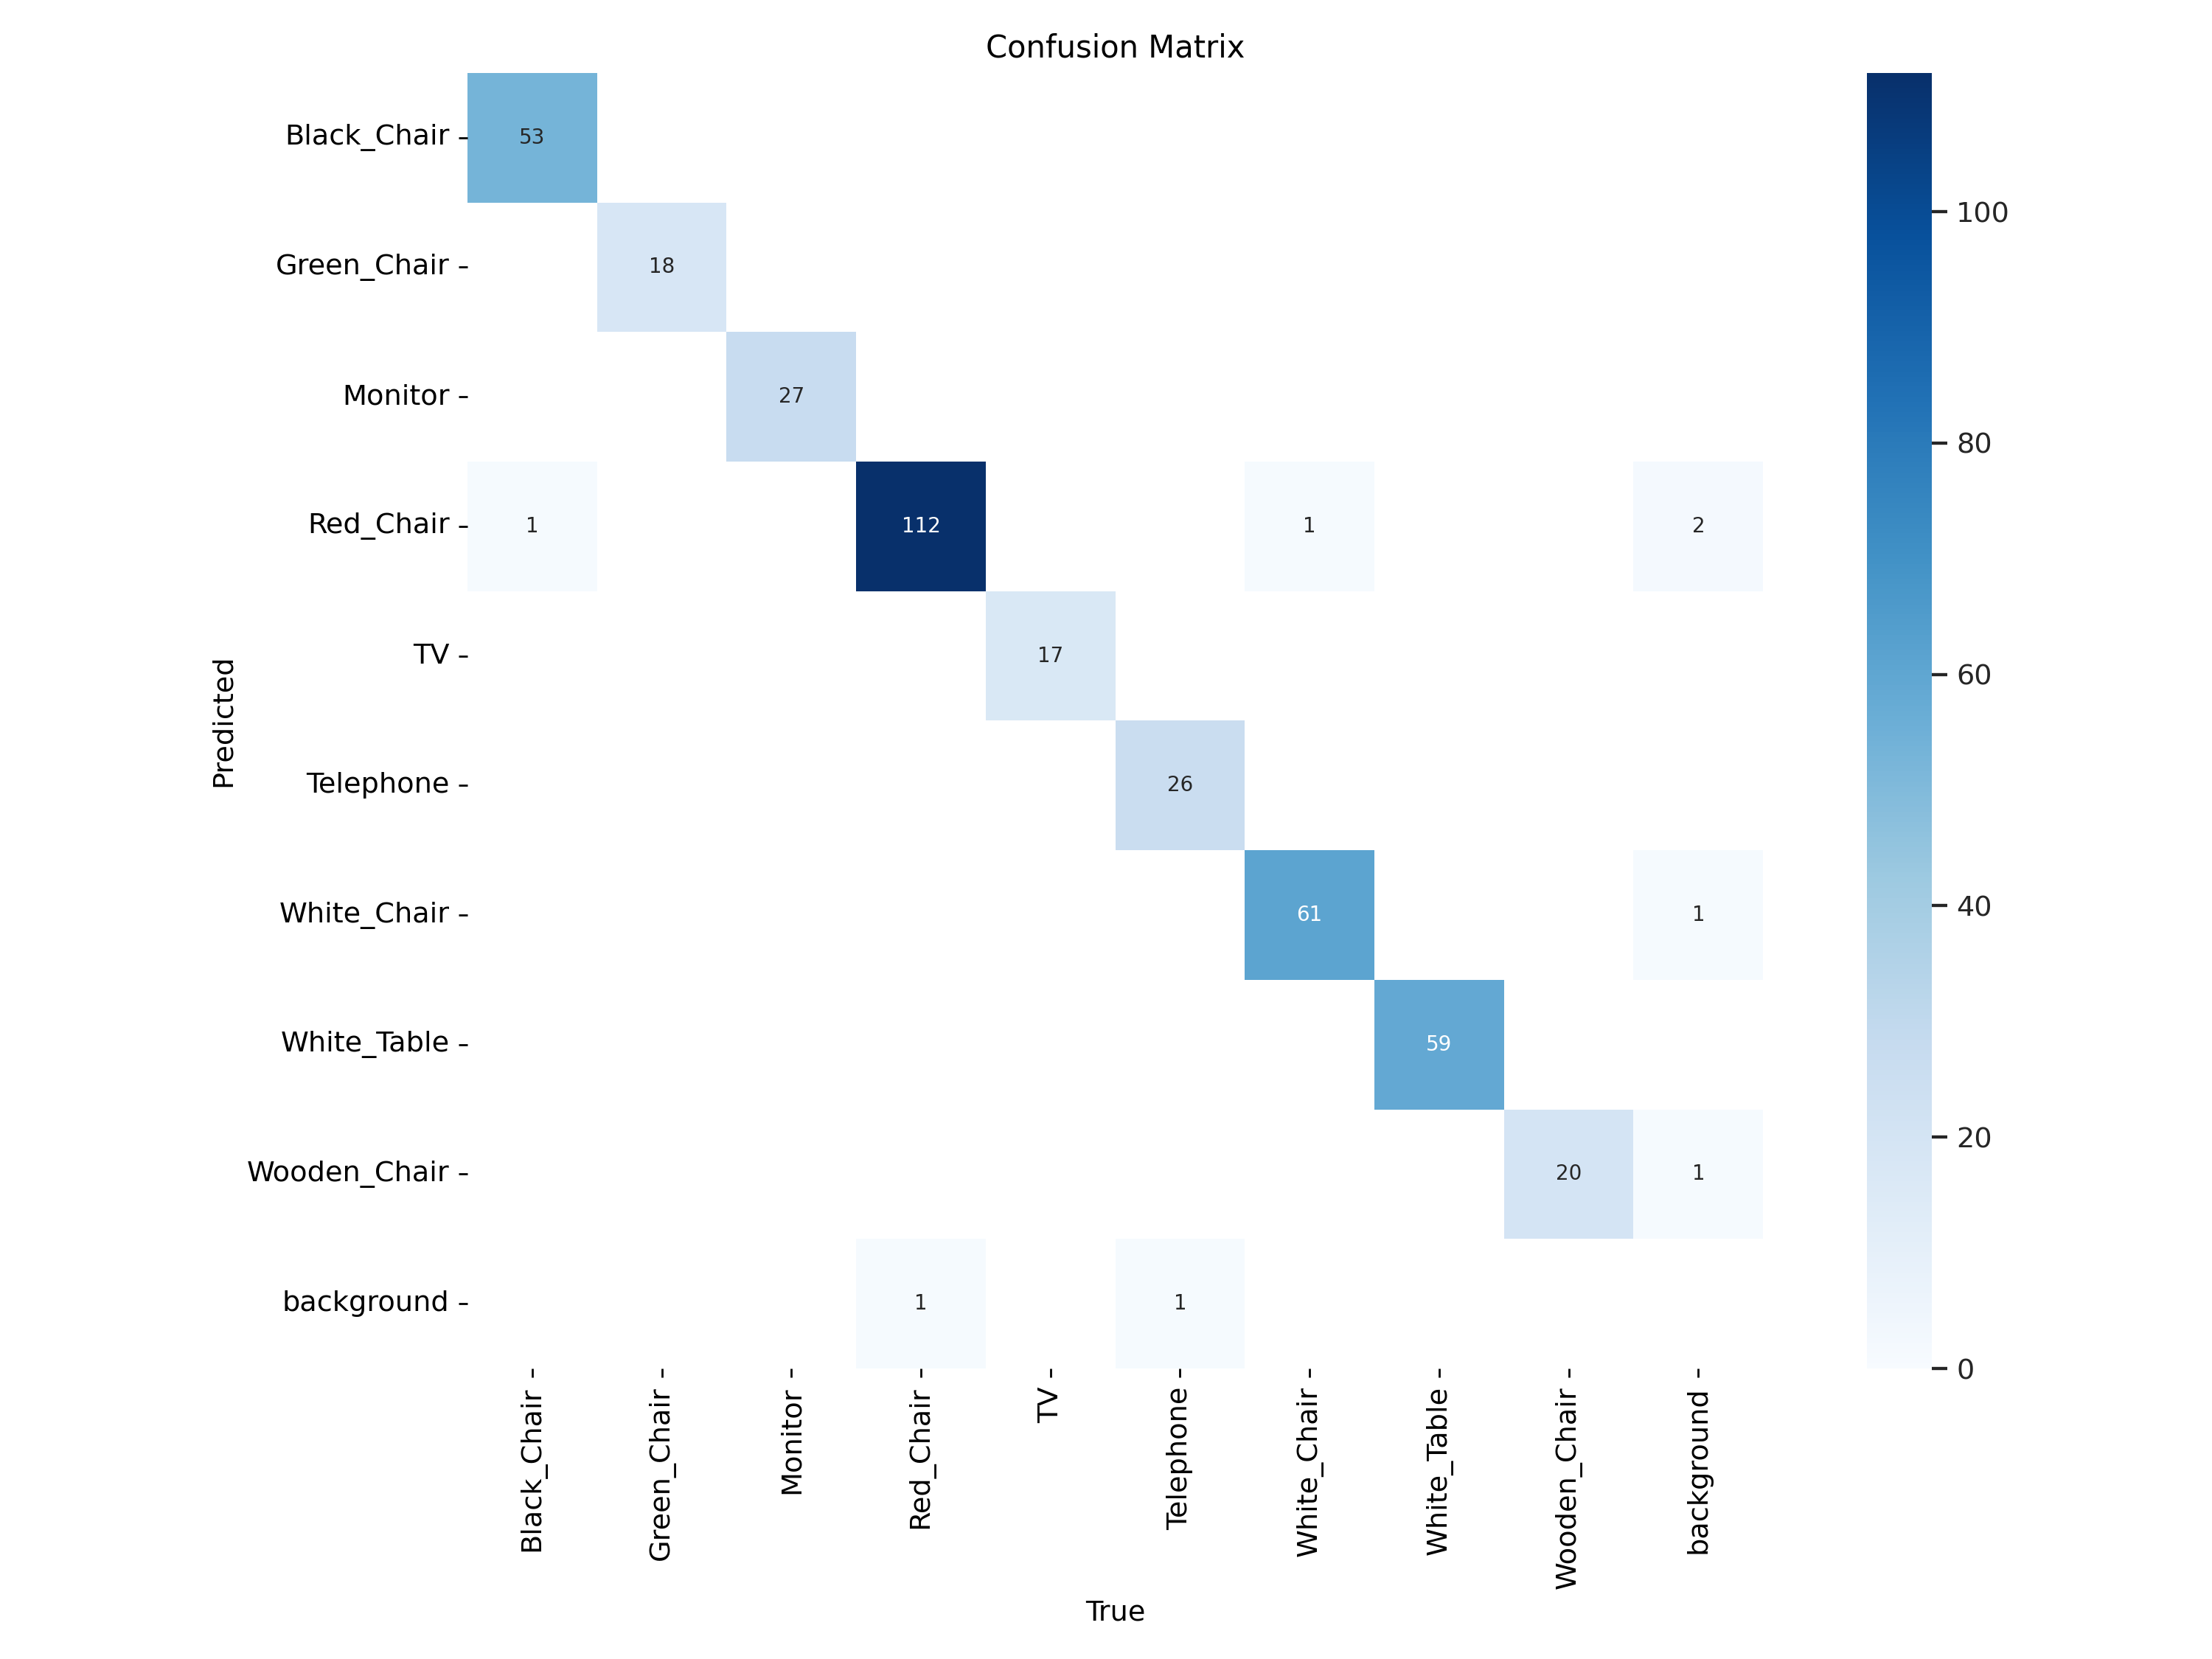

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


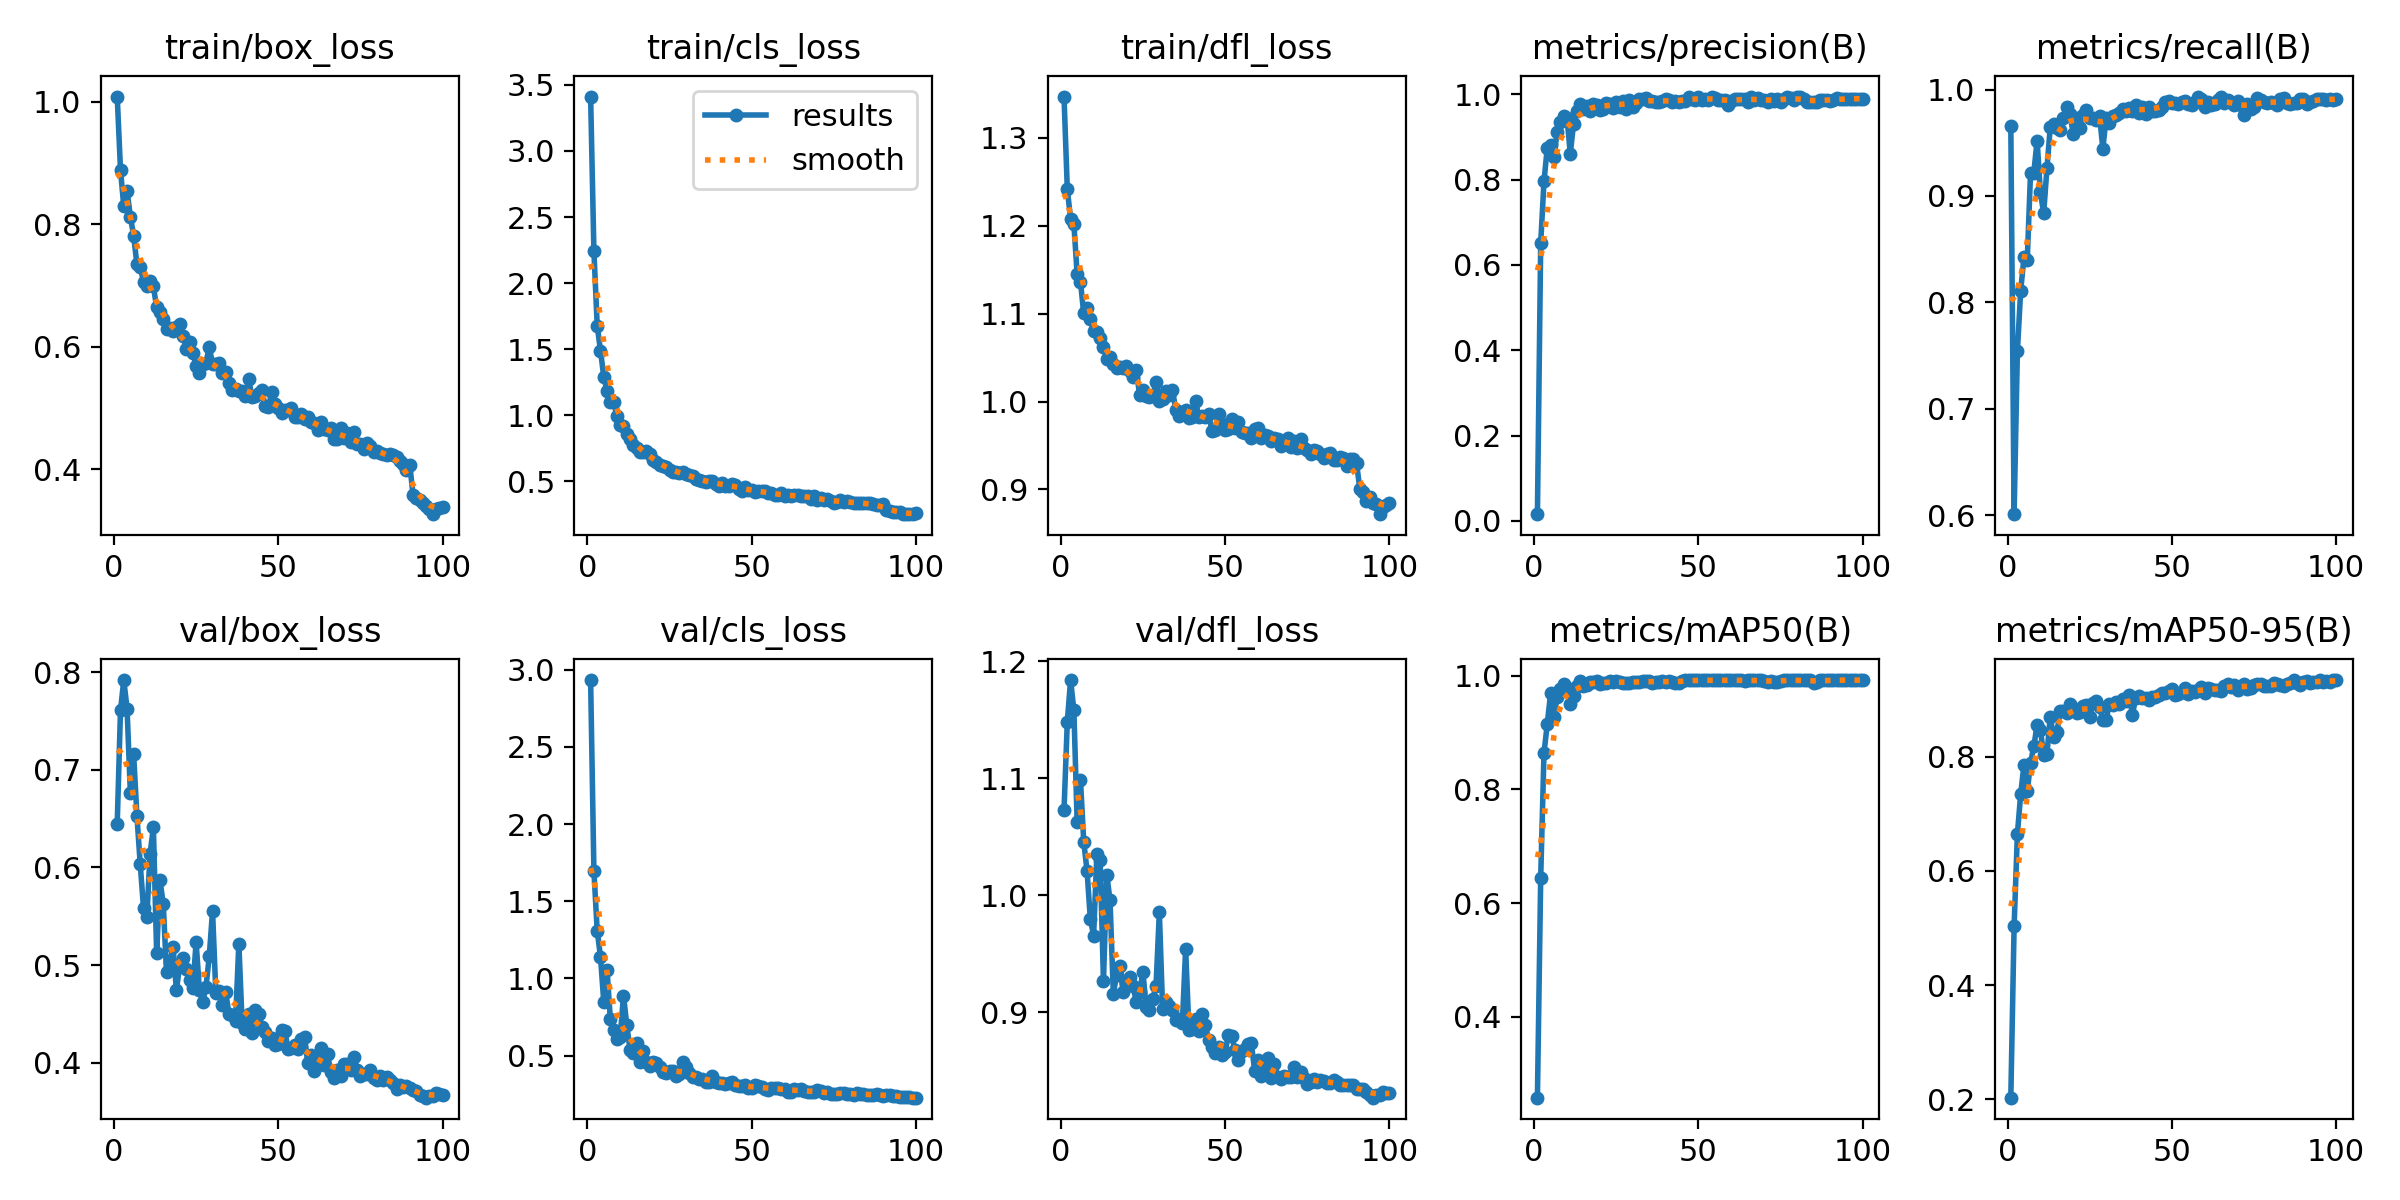

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True imgsz=700

/content
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ imgsz=[700] must be multiple of max stride 32, updating to [704]
image 1/94 /content/dataset/items_detect-10/test/images/scene00001_png.rf.f246b34f2bda499794ffed7d703fbd5c.jpg: 704x704 1 Red_Chair, 1 White_Table, 8.8ms
image 2/94 /content/dataset/items_detect-10/test/images/scene00133_png.rf.81c616b213719d6dd7b2d77a48580974.jpg: 704x704 1 Red_Chair, 1 White_Table, 8.2ms
image 3/94 /content/dataset/items_detect-10/test/images/scene00217_png.rf.ea2dfb6927de130ced0cb7b6de0c05b5.jpg: 704x704 1 Red_Chair, 8.1ms
image 4/94 /content/dataset/items_detect-10/test/images/scene00313_png.rf.f47f9a8e8fe3ee45aea384b524ca0e73.jpg: 704x704 1 Red_Chair, 8.1ms
image 5/94 /content/dataset/items_detect-10/test/images/scene00421_png.rf.25705a0875280b520d3fade8bf5fc842.jpg: 704x704 1 Red_Chair, 8.1ms
image 6/94 /content/dataset

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.93, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/javid-4mvz6/items_detect/10
Share your model with the world at: https://universe.roboflow.com/javid-4mvz6/items_detect/model/10
